**Importing the Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**Read the Dataset**

In [ ]:
df = pd.read_csv("/content/anemia.csv")
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


**Data Preparation**

In [ ]:
#Handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [ ]:
df.shape

(1421, 6)

In [ ]:
df.isnull().sum()

,0
Gender,0
Hemoglobin,0
MCH,0
MCHC,0
MCV,0
Result,0


<ipython-input-6-cbd8f8a6953b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Result"], palette="viridis")


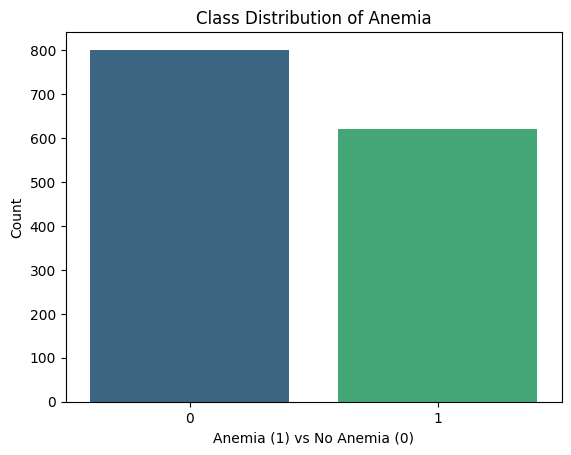

Result
0    801
1    620
Name: count, dtype: int64


In [ ]:
#Handling Imbalanced Values


# Plot class distribution
sns.countplot(x=df["Result"], palette="viridis")
plt.title("Class Distribution of Anemia")
plt.xlabel("Anemia (1) vs No Anemia (0)")
plt.ylabel("Count")
plt.show()

# Print the value counts
print(df["Result"].value_counts())


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming 'df' is already defined as in the notebook.
# Define X and y
X = df.drop("Result", axis=1)
y = df["Result"]

# Apply undersampling
undersample = RandomUnderSampler(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Convert back to a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Result"] = y_resampled

print("New Class Distribution:\n", df_resampled["Result"].value_counts())

New Class Distribution:
 Result
0    620
1    620
Name: count, dtype: int64


<ipython-input-8-a8573f8308dd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_resampled["Result"], palette="viridis")


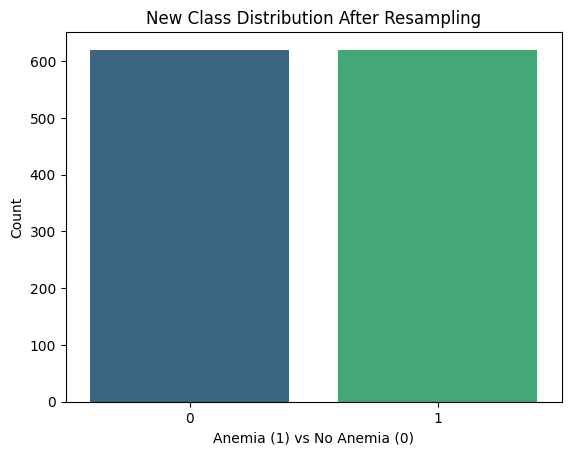

In [ ]:
sns.countplot(x=df_resampled["Result"], palette="viridis")
plt.title("New Class Distribution After Resampling")
plt.xlabel("Anemia (1) vs No Anemia (0)")
plt.ylabel("Count")
plt.show()


**Exploratory Data Analysis.**

In [ ]:
#Descriptive statistical
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


#Visual analysis

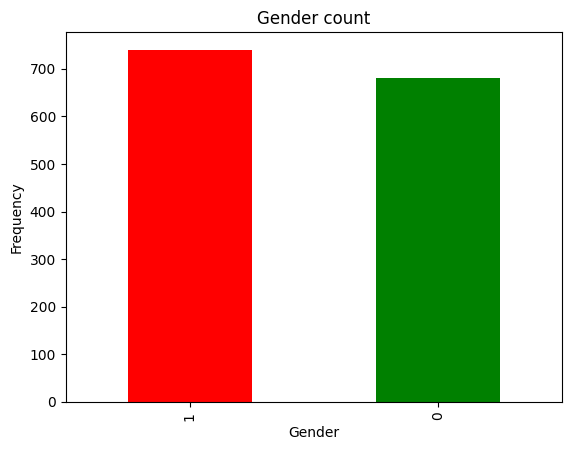

In [ ]:
#Univariate analysis
# Countplot for anemia distribution
output= df["Gender"].value_counts()
output.plot(kind="bar", color=["red", "green"])
plt.title("Gender count")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

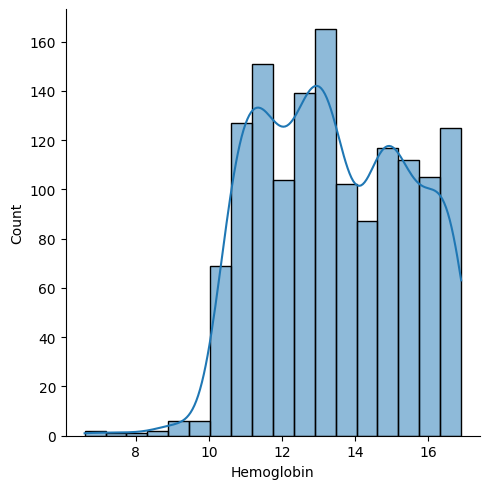

In [ ]:
sns.displot(df["Hemoglobin"], kde=True)

<ipython-input-15-b098abd841af>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(y=df["Hemoglobin"], x=df["Gender"], hue=df["Result"], ci=None, palette="coolwarm")
<ipython-input-15-b098abd841af>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'])


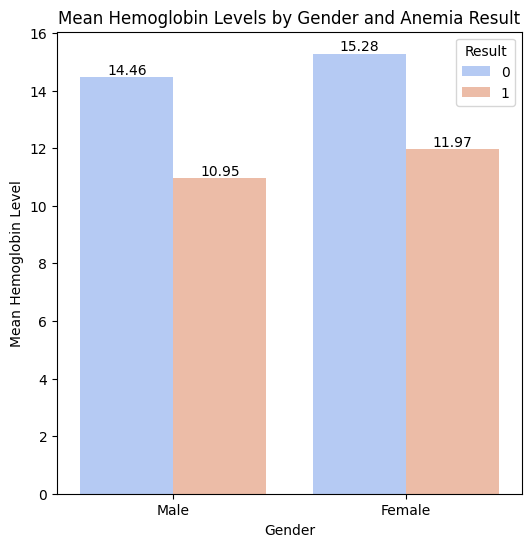

In [ ]:
#Bivariate analysis

plt.figure(figsize=(6,6))

# Creating a barplot
ax = sns.barplot(y=df["Hemoglobin"], x=df["Gender"], hue=df["Result"], ci=None, palette="coolwarm")

# Fixing the x-axis labels
ax.set_xticklabels(['Male', 'Female'])

# Adding labels and title
ax.set_xlabel("Gender")
ax.set_ylabel("Mean Hemoglobin Level")
ax.set_title("Mean Hemoglobin Levels by Gender and Anemia Result")

# Adding values on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.4g")  # Display values with 4 decimal places

plt.show()


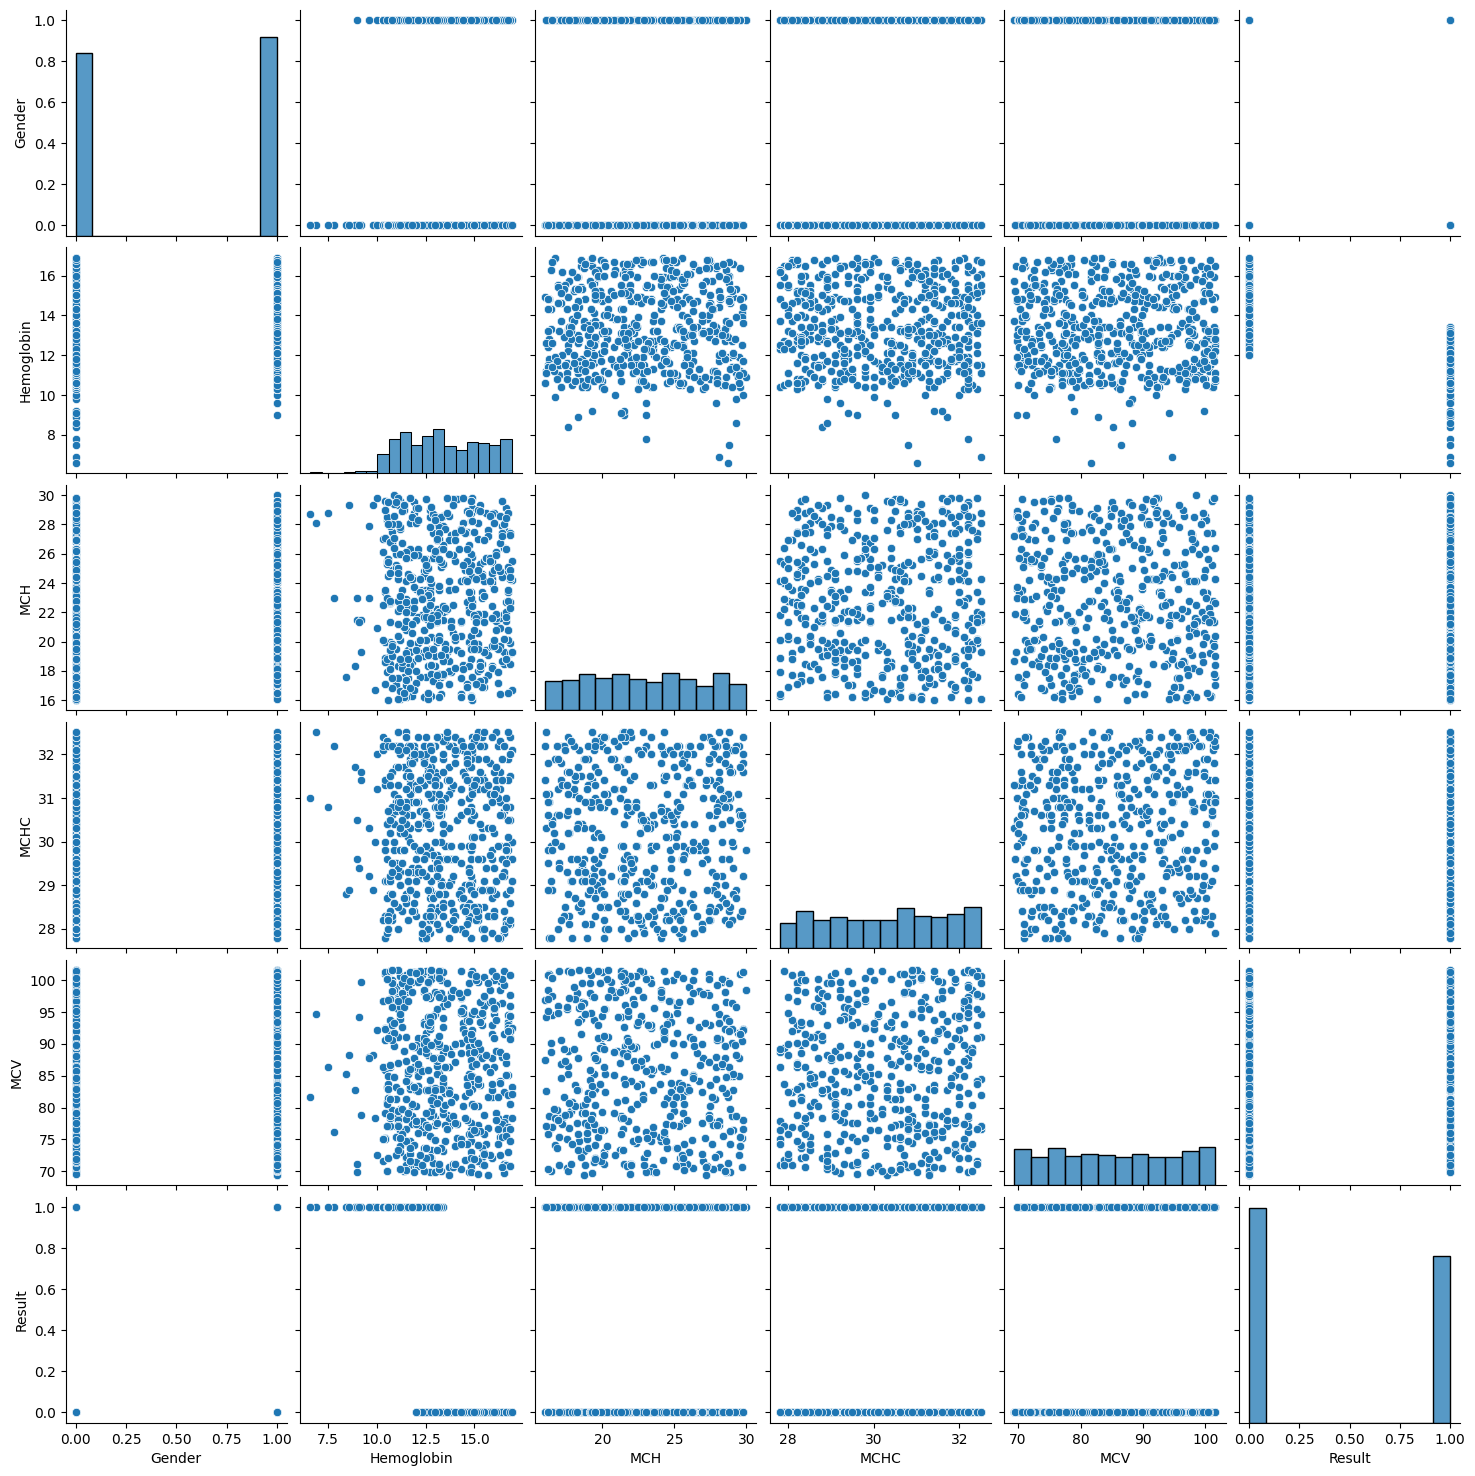

In [ ]:
#Multivariate analysis
sns.pairplot(df)

<Axes: >

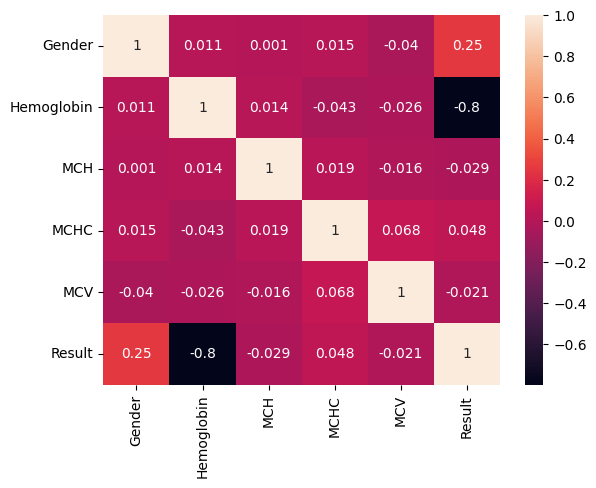

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Splitting data into train and test
x=df.drop("Result",axis=1)
x


,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5
...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7
1419,0,14.3,16.2,29.5,95.2


In [ ]:
y=df["Result"]
y

,Result
0,0
1,0
2,1
3,0
4,0
...,...
1416,1
1417,1
1418,1
1419,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1136, 5)
(285, 5)
(1136,)
(285,)


**Model BUilding**

In [ ]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

# Make predictions
y_pred = logistic_regression.predict(x_test)

# Calculate accuracy score and classification report
acc_lr = accuracy_score(y_test, y_pred)
c_lr = classification_report(y_test, y_pred)

# Print results
print('Accuracy Score:', acc_lr)
print(c_lr)


Accuracy Score: 0.9894736842105263
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       157
           1       0.98      1.00      0.99       128

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285



In [ ]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

# Make predictions
y_pred = random_forest.predict(x_test)

# Calculate accuracy score and classification report
acc_rf = accuracy_score(y_test, y_pred)
c_rf = classification_report(y_test, y_pred)

# Print results
print('Accuracy Score:', acc_rf)
print(c_rf)


Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       128

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



In [ ]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

# Make predictions
y_pred = decision_tree_model.predict(x_test)

# Calculate accuracy score and classification report
acc_dt = accuracy_score(y_test, y_pred)
c_dt = classification_report(y_test, y_pred)

# Print results
print('Accuracy Score:', acc_dt)
print(c_dt)


Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       128

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



In [ ]:
#Gaussian Navies Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Gaussian Naive Bayes model
NB = GaussianNB()
NB.fit(x_train, y_train)

# Make predictions
y_pred = NB.predict(x_test)

# Calculate accuracy score and classification report
acc_nb = accuracy_score(y_test, y_pred)
c_nb = classification_report(y_test, y_pred)

# Print results
print('Accuracy Score:', acc_nb)
print(c_nb)


Accuracy Score: 0.9508771929824561
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       157
           1       0.95      0.95      0.95       128

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.95      0.95      0.95       285



In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Support Vector Classifier
support_vector = SVC()
support_vector.fit(x_train, y_train)

# Make predictions
y_pred = support_vector.predict(x_test)

# Calculate accuracy score and classification report
acc_svc = accuracy_score(y_test, y_pred)
c_svc = classification_report(y_test, y_pred)

# Print results
print('Accuracy Score:', acc_svc)
print(c_svc)


Accuracy Score: 0.9368421052631579
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       157
           1       0.93      0.93      0.93       128

    accuracy                           0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285



In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Gradient Boosting Classifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)

# Make predictions
y_pred = GBC.predict(x_test)

# Calculate accuracy score and classification report
acc_gbc = accuracy_score(y_test, y_pred)
c_gbc = classification_report(y_test, y_pred)

# Print results
print('Accuracy Score:', acc_gbc)
print(c_gbc)


Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       128

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



**Testing the model**

In [ ]:
import pandas as pd

# Define the feature names (must match those used in training)
feature_names = ["Gender","Hemoglobin","MCH","MCHC","MCV"]  # Replace with actual names

# Create a DataFrame for the input
input_data = pd.DataFrame([[1, 14.0, 4.8, 90.0, 30.0]], columns=feature_names)

# Make prediction
prediction = GBC.predict(input_data)

# Interpret result
if prediction[0] == 0:
    print("You don't have any Anemic Disease")
elif prediction[0] == 1:
    print("You have anemic disease")


You don't have any Anemic Disease


**Testing model with multiple evaluation metrics**

In [ ]:
import pandas as pd

model = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Decision Tree Classifier',
        'RandomForest Classifier',
        'Gaussian Naïve Bayes',
        'Support Vector Classifier',
        'Gradient Boost Classifier'
    ],
    'Score': [acc_lr, acc_dt, acc_rf, acc_nb, acc_svc, acc_gbc]
})



In [ ]:
model

,Model,Score
0,Linear Regression,0.989474
1,Decision Tree Classifier,1.000000
2,RandomForest Classifier,1.000000
3,Gaussian Naïve Bayes,0.950877
4,Support Vector Classifier,0.936842
5,Gradient Boost Classifier,1.000000


#save the best model

In [ ]:
import pickle
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Save the model properly
with open("model.pkl", "wb") as file:
    pickle.dump(GBC, file)



In [ ]:
from google.colab import files
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>